## Giải nén dữ liệu

In [3]:
!unzip 'data/Aloe_images'
!unzip 'data/tsukuba'

Archive:  Aloe_images.zip
  inflating: Aloe/Aloe_left_1.png    
  inflating: Aloe/Aloe_right_3.png   
  inflating: Aloe/Aloe_right_1.png   
  inflating: Aloe/Aloe_right_2.png   
  inflating: Aloe/Disparity_map_corr.png  
Archive:  tsukuba.zip
mapname:  conversion of  failed
 extracting: left.png                
 extracting: right.png               
 extracting: groundtruth.png         


## Tính Stereo_matching bằng phương pháp Pixel_wise_matching sử dụng L1_scores

In [4]:
import numpy as np
import cv2

def distance(x, y):
  return abs(x - y)

def pixel_wise_matching(left_image, right_image, disparity_range, save=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]
  depth = np.zeros((height, width), np.uint8)
  max_value = 255
  scale = 16

  for y in range(height):
    for x in range(width):
      disparity = 0
      cost_min = max_value
      for j in range(disparity_range):
        cost = max_value if (x - j < 0) else distance(int(left_image[y, x]), int(right_image[y, x - j]))

        if cost < cost_min:
          cost_min = cost
          disparity = j

      depth[y, x] = disparity * scale

  if save:
    cv2.imwrite('depth.png', depth)
    cv2.imwrite('depth_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth

array([[  0,  16,  32, ...,  48, 192, 208],
       [  0,  16,  32, ..., 240, 240, 240],
       [  0,  16,  32, ..., 208, 224, 240],
       ...,
       [  0,   0,   0, ..., 240, 224, 240],
       [  0,  16,   0, ..., 208, 224, 240],
       [  0,   0,  32, ..., 112, 128, 144]], dtype=uint8)
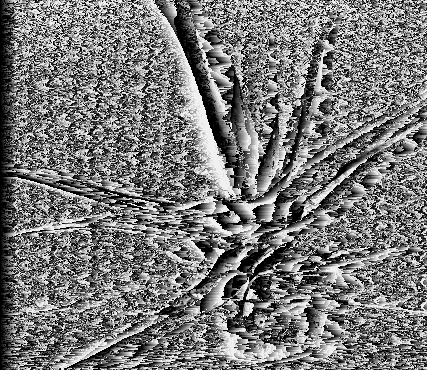

In [5]:
pixel_wise_matching('/content/Aloe/Aloe_left_1.png', '/content/Aloe/Aloe_right_1.png', 16)

In [6]:
def l1_score(x, y):
  return abs(x - y)

def pixel_wise_matching_l1(left_image, right_image, disparity_range, save_result=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]

  depth = np.zeros((height, width), np.uint8)
  scale = 16
  max_value = 255

  for y in range(height):
    for x in range(width):
      disparity = 0
      cost_min = max_value
      for j in range(disparity_range):
        cost = max_value if (x - j < 0) else l1_score(int(left_image[y, x]), int(right_image[y, x - j]))

        if cost < cost_min:
          cost_min = cost
          disparity = j

      depth[y, x] = disparity * scale
  if save_result:
    cv2.imwrite('depth_l1_score.png', depth)
    cv2.imwrite('depth_color_l1_score.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, 16,  0],
       [ 0,  0,  0, ..., 16, 32,  0],
       [ 0,  0,  0, ..., 64, 64,  0]], dtype=uint8)
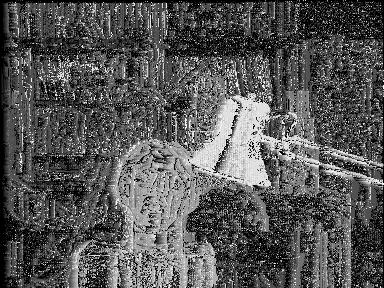

In [7]:
pixel_wise_matching_l1('/content/left.png', '/content/right.png', 16)

## Tính Stereo_matching bằng phương pháp Pixel_wise_matching sử dụng L2_scores

In [8]:
def l2_score(x, y):
  return (x - y) ** 2

def pixel_wise_matching_l2(left_image, right_image, disparity_range, save_result=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]

  depth = np.zeros((height, width), np.uint8)
  scale = 16
  max_value = 255

  for y in range(height):
    for x in range(width):
      disparity = 0
      cost_min = max_value
      for j in range(disparity_range):
        cost = max_value if (x - j < 0) else l2_score(int(left_image[y, x]), int(right_image[y, x - j]))

        if cost < cost_min:
          cost_min = cost
          disparity = j

      depth[y, x] = disparity * scale
  if save_result:
    cv2.imwrite('depth_l2_score.png', depth)
    cv2.imwrite('depth_color_l2_score.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, 16,  0],
       [ 0,  0,  0, ..., 16, 32,  0],
       [ 0,  0,  0, ..., 64, 64,  0]], dtype=uint8)
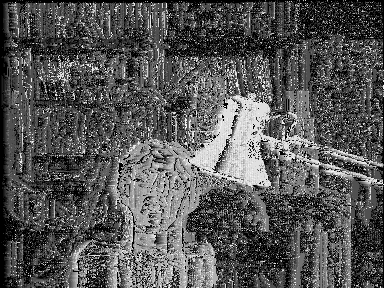

In [9]:
pixel_wise_matching_l2('/content/left.png', '/content/right.png', 16)

# Dùng Window_based_matching để giảm nhiễu ảnh

## Tính Stereo_matching bằng phương pháp Window_based_matching sử dụng L1_scores

In [10]:
def l1_score(x, y):
  return abs(x - y)

def window_based_matching_l1(left_image, right_image, disparity_range, kernel_size=3, save_result=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]

  depth = np.zeros((height, width), np.uint8)
  kernel_half = (kernel_size - 1) // 2
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
      disparity = 0
      cost_min = max_value
      for j in range(disparity_range):
        total = 0
        value = 0

        for u in range(-kernel_half, kernel_half + 1):
          for v in range(-kernel_half, kernel_half + 1):
            value = max_value
            if x + v - j >= 0:
              value = l1_score(int(left_image[y + u, x + v]), int(right_image[y + u, x + v - j]))
            total += value

        if total < cost_min:
          cost_min = total
          disparity = j

      depth[y, x] = disparity * scale

  if save_result:
    cv2.imwrite('depth_window_l1.png', depth)
    cv2.imwrite('depth_window_color_l1.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   3, ...,  45,  48,   0],
       [  0,   0,   3, ...,  45,  48,   0],
       ...,
       [  0,   0,   0, ..., 129, 126,   0],
       [  0,   0,   0, ..., 129, 129,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
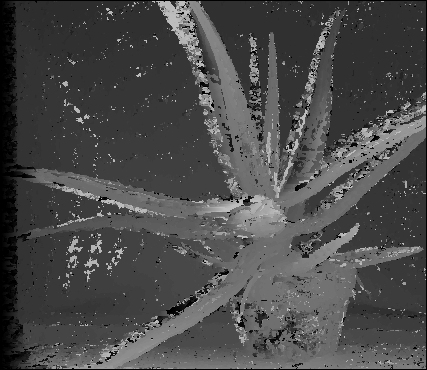

In [11]:
window_based_matching_l1('/content/Aloe/Aloe_left_1.png', '/content/Aloe/Aloe_right_1.png', 64)

## Tính Stereo_matching bằng phương pháp Window_based_matching sử dụng L2_scores

In [12]:
def l2_score(x, y):
  return (x - y) ** 2

def window_based_matching_l2(left_image, right_image, disparity_range, kernel_size=3, save_result=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]

  depth = np.zeros((height, width), np.uint8)
  kernel_half = (kernel_size - 1) // 2
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
      disparity = 0
      cost_min = max_value
      for j in range(disparity_range):
        total = 0
        value = 0

        for u in range(-kernel_half, kernel_half + 1):
          for v in range(-kernel_half, kernel_half + 1):
            value = max_value
            if x + v - j >= 0:
              value = l2_score(int(left_image[y + u, x + v]), int(right_image[y + u, x + v - j]))
            total += value

        if total < cost_min:
          cost_min = total
          disparity = j

      depth[y, x] = disparity * scale

  if save_result:
    cv2.imwrite('depth_window_l2.png', depth)
    cv2.imwrite('depth_window_color_l2.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  45,  48,   0],
       [  0,   0,   0, ...,  45,  48,   0],
       ...,
       [  0,   0,   0, ..., 126, 126,   0],
       [  0,   0,   0, ..., 129, 129,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
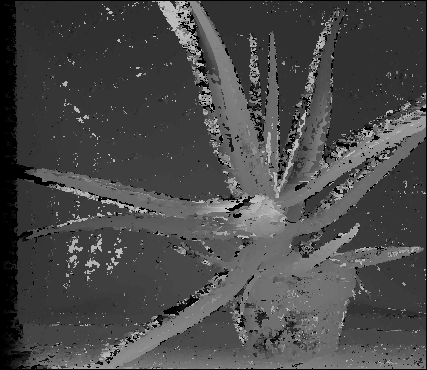

In [13]:
window_based_matching_l2('/content/Aloe/Aloe_left_1.png', '/content/Aloe/Aloe_right_1.png', 64)

## Thử nghiệm với ảnh có độ sáng khác nhau

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 48, 51,  0],
       [ 0,  0,  0, ..., 39, 42,  0],
       ...,
       [ 0,  0,  3, ..., 15, 18,  0],
       [ 0,  0,  3, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)
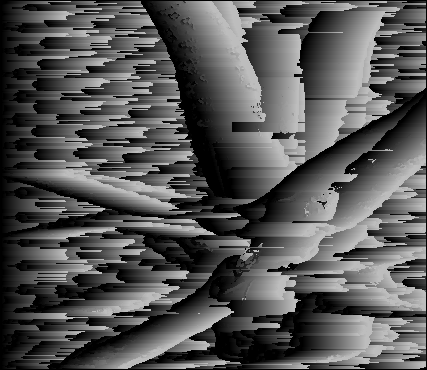

In [14]:
window_based_matching_l1('/content/Aloe/Aloe_left_1.png', '/content/Aloe/Aloe_right_2.png', 64)

## Tính Stereo_matching bằng phương pháp Window_based_matching sử Cosine_similarity đối với input đầu vào có ảnh khác độ sáng


In [15]:
def cosine_similarity(x, y):
  numerator = x @ y
  denominator = np.linalg.norm(x) * np.linalg.norm(y)

  return numerator / denominator

def window_based_matching(left_image, right_image, disparity_range, kernel_size=5, save_result=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]

  depth = np.zeros((height, width), np.uint8)
  kernel_half = (kernel_size - 1) // 2
  scale = 3
  max_value = 255

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
      disparity = 0
      cost_optional = -1

      for j in range(disparity_range):
        d = x - j
        cost = -1
        if (d - kernel_half) > 0:
          wp = left_image[(y - kernel_half): (y + kernel_half) + 1, (x - kernel_half): (x + kernel_half) + 1]
          wpd = right_image[(y - kernel_half): (y + kernel_half) + 1, (d - kernel_half): (d + kernel_half) + 1]

          wp_flattened = wp.flatten()
          wpd_flattened = wpd.flatten()

          cost = cosine_similarity(wp_flattened, wpd_flattened)

        if cost > cost_optional:
          cost_optional = cost
          disparity = j

      depth[y, x] = disparity * scale

  if save_result:
    cv2.imwrite('window_based_cosine_similarity.png', depth)
    cv2.imwrite('window_based_color_cosine_similarity.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  48,   0,   0],
       ...,
       [  0,   0,   0, ..., 126,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
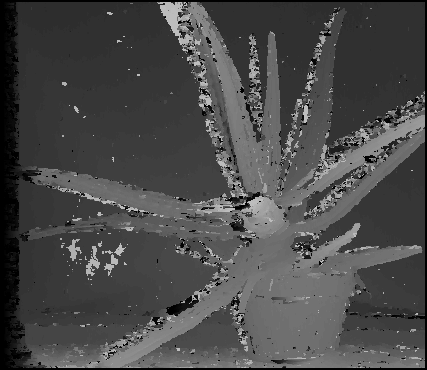

In [26]:
window_based_matching('/content/Aloe/Aloe_left_1.png', '/content/Aloe/Aloe_right_2.png', 64)

## Expand: Tính Stereo_matching bằng Correlation_coefficient

In [30]:
def correlation_coefficient(x, y):
  devation_x = x - np.mean(x)
  devation_y = y - np.mean(y)

  numerator = np.dot(x, y)
  denominator = np.linalg.norm(devation_x) * np.linalg.norm(devation_y)

  return numerator / denominator

def window_based_matching_correlation(left_image, right_image, disparity_range, kernel_size=5, save_result=True):
  left_image = cv2.imread(left_image, 0)
  right_image = cv2.imread(right_image, 0)

  left_image = left_image.astype(np.float32)
  right_image = right_image.astype(np.float32)

  height, width = left_image.shape[:2]

  depth = np.zeros((height, width), np.uint8)
  kernel_half = (kernel_size - 1) // 2
  scale = 3
  max_value = 255 * 9

  for y in range(kernel_half, height - kernel_half):
    for x in range(kernel_half, width - kernel_half):
      disparity = 0
      cost_optional = -1

      for j in range(disparity_range):
        d = x - j
        cost = -1

        if (d - kernel_half) > 0:
          wp = left_image[(y - kernel_half): (y + kernel_half) + 1, (x - kernel_half): (x + kernel_half) + 1]
          wpd = right_image[(y - kernel_half): (y + kernel_half) + 1, (d - kernel_half): (d + kernel_half) + 1]

          wp_flattened = wp.flatten()
          wpd_flattened = wpd.flatten()

          cost = correlation_coefficient(wp_flattened, wpd_flattened)

        if cost > cost_optional:
          cost_optional = cost
          disparity = j

      depth[y, x] = disparity * scale

  if save_result:
    cv2.imwrite('window_based_correlation.png', depth)
    cv2.imwrite('window_based_color_correlation.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  return depth

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 189,   0,   0],
       ...,
       [  0,   0,   0, ...,  96,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
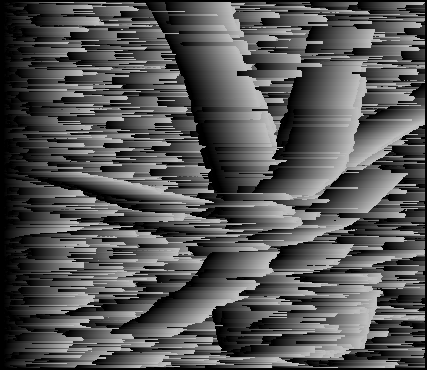

In [31]:
window_based_matching_correlation('/content/Aloe/Aloe_left_1.png', '/content/Aloe/Aloe_right_2.png', 64)